## Generalidades
y = f(x) =  mx +b

Donde:

y = la variable dependiente
x = variable independiente
m = pendiente de la recta(parámetro del modelo)
b = intercepto(parámetro del modelo)

#### se busca encontrar que valores de “m” y “b” producen una recta que describa de la mejor manera posible la relación entre los datos “x” y “y”.

In [139]:
# Importando las libreríass a utilizar
import numpy as np
import seaborn as sns
import pandas as pd

In [58]:
# Importando Data a utilizar en el proyecto:
import numpy as np
import
data_total = np.load('C:/Users/Gary/Google Drive/Universidad/MAESTRIA/Data Science/Año 1/1. Trimestre I/2. Ciencia de Datos en Python/Tareas/Proyecto Final/proyecto_data/proyecto_training_data.npy')
data_total.shape


(1460, 6)

In [93]:
#utilizando Slicing para dividir el dataset
#Se usará el 80% para los "Datos de entrenamiento"
Parte1 = round(len(data_total)*0.8)
data_entrenamiento = (data_total[0:Parte1,0:6])

#Se usará el 20% para "Datos de validación y pruebas"
Parte2 = round(len(data_total)*0.2)
data_validacion = (data_total[0:Parte2,0:6])

#Validacion de las dos partes:
print("Data Total: ")
print(data_total.shape)
print("Data Entrenamiento: ")
print(data_entrenamiento.shape)

print("Data Validacion: ")
print(data_validacion.shape)


Data Total: 
(1460, 6)
Data Entrenamiento: 
(1168, 6)
Data Validacion: 
(292, 6)


AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [68]:
#Análisis Exploratorio de Datos:
#Media de las variables
numero = 0
while numero < 6:
    print("Media Columna: ", numero)
    print(round(np.mean(data_entrenamiento[:,numero]),2))
    print("Valor Maximo Columna: ", numero)
    print(round(np.max(data_entrenamiento[:,numero]),2))
    print("Valor Minimo Columna: ", numero)
    print(round(np.min(data_entrenamiento[:,numero]),2))
    print("Rango Columna ", numero)
    print(round(np.ptp(data_entrenamiento[:,numero]),2))
    print("Desvacion Estandard Columna: ", numero)
    print(round(np.std(data_entrenamiento[:,numero]),2))

    numero+=1
    

Media Columna:  0
180590.28
Valor Maximo Columna:  0
755000.0
Valor Minimo Columna:  0
34900.0
Rango Columna  0
720100.0
Desvacion Estandard Columna:  0
78781.95
Media Columna:  1
6.1
Valor Maximo Columna:  1
10.0
Valor Minimo Columna:  1
1.0
Rango Columna  1
9.0
Desvacion Estandard Columna:  1
1.38
Media Columna:  2
1156.32
Valor Maximo Columna:  2
3228.0
Valor Minimo Columna:  2
334.0
Rango Columna  2
2894.0
Desvacion Estandard Columna:  2
373.62
Media Columna:  3
6.49
Valor Maximo Columna:  3
14.0
Valor Minimo Columna:  3
2.0
Rango Columna  3
12.0
Desvacion Estandard Columna:  3
1.61
Media Columna:  4
1971.45
Valor Maximo Columna:  4
2010.0
Valor Minimo Columna:  4
1875.0
Rango Columna  4
135.0
Desvacion Estandard Columna:  4
29.94
Media Columna:  5
nan
Valor Maximo Columna:  5
nan
Valor Minimo Columna:  5
nan
Rango Columna  5
nan
Desvacion Estandard Columna:  5
nan


C:\Users\Gary\anaconda3\envs\py_galileo_2021\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

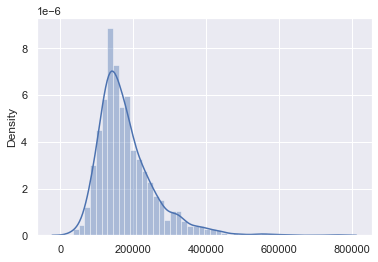

In [134]:
#numero = 1
#while(numero < 6):
#    print("Histograma de la variable ", numero)
#    print(sns.histplot(data_entrenamiento[:,numero]))
#    print("---------------------------------")
#    numero+=1

sns.distplot(data_entrenamiento[:,0])

C:\Users\Gary\anaconda3\envs\py_galileo_2021\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

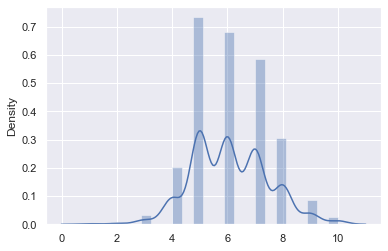

In [135]:

sns.distplot(data_entrenamiento[:,1])

C:\Users\Gary\anaconda3\envs\py_galileo_2021\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

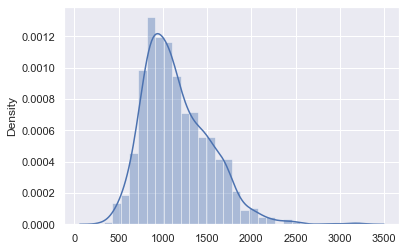

In [133]:
sns.distplot(data_entrenamiento[:,2])

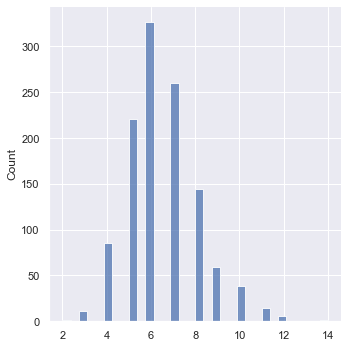

In [132]:
sns.displot(data_entrenamiento[:,3])

C:\Users\Gary\anaconda3\envs\py_galileo_2021\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

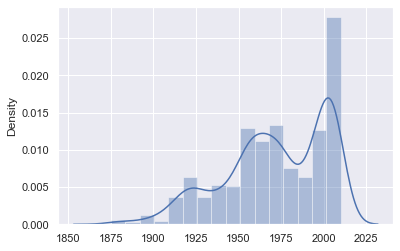

In [128]:
sns.distplot(data_entrenamiento[:,4])

C:\Users\Gary\anaconda3\envs\py_galileo_2021\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

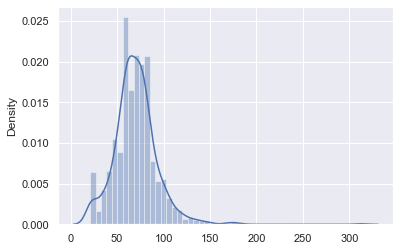

In [131]:
sns.distplot(data_entrenamiento[:,5])